In [ ]:
# loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# from google.colab import files
# uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Data Science/Project/airline_passenger_satisfaction.csv", index_col=['ID'])
data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


#### Data Understanding

In [ ]:
# Continuous Features Report
import warnings

def build_continuous_features_report(data_df):

    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [ ]:
build_continuous_features_report(data)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
Age,129880,0.000000,75,7.0,27.0,39.427957,40.0,51.0,85.0,15.119360
Flight Distance,129880,0.000000,3821,31.0,414.0,1190.316392,844.0,1744.0,4983.0,997.452477
Departure Delay,129880,0.000000,466,0.0,0.0,14.713713,0.0,12.0,1592.0,38.071126
Arrival Delay,129880,0.302587,472,0.0,0.0,15.091129,0.0,13.0,1584.0,38.465650
Departure and Arrival Time Convenience,129880,0.000000,6,0.0,2.0,3.057599,3.0,4.0,5.0,1.526741
Ease of Online Booking,129880,0.000000,6,0.0,2.0,2.756876,3.0,4.0,5.0,1.401740
Check-in Service,129880,0.000000,6,0.0,3.0,3.306267,3.0,4.0,5.0,1.266185
Online Boarding,129880,0.000000,6,0.0,2.0,3.252633,3.0,4.0,5.0,1.350719
Gate Location,129880,0.000000,6,0.0,2.0,2.976925,3.0,4.0,5.0,1.278520
On-board Service,129880,0.000000,6,0.0,2.0,3.383023,4.0,4.0,5.0,1.287099


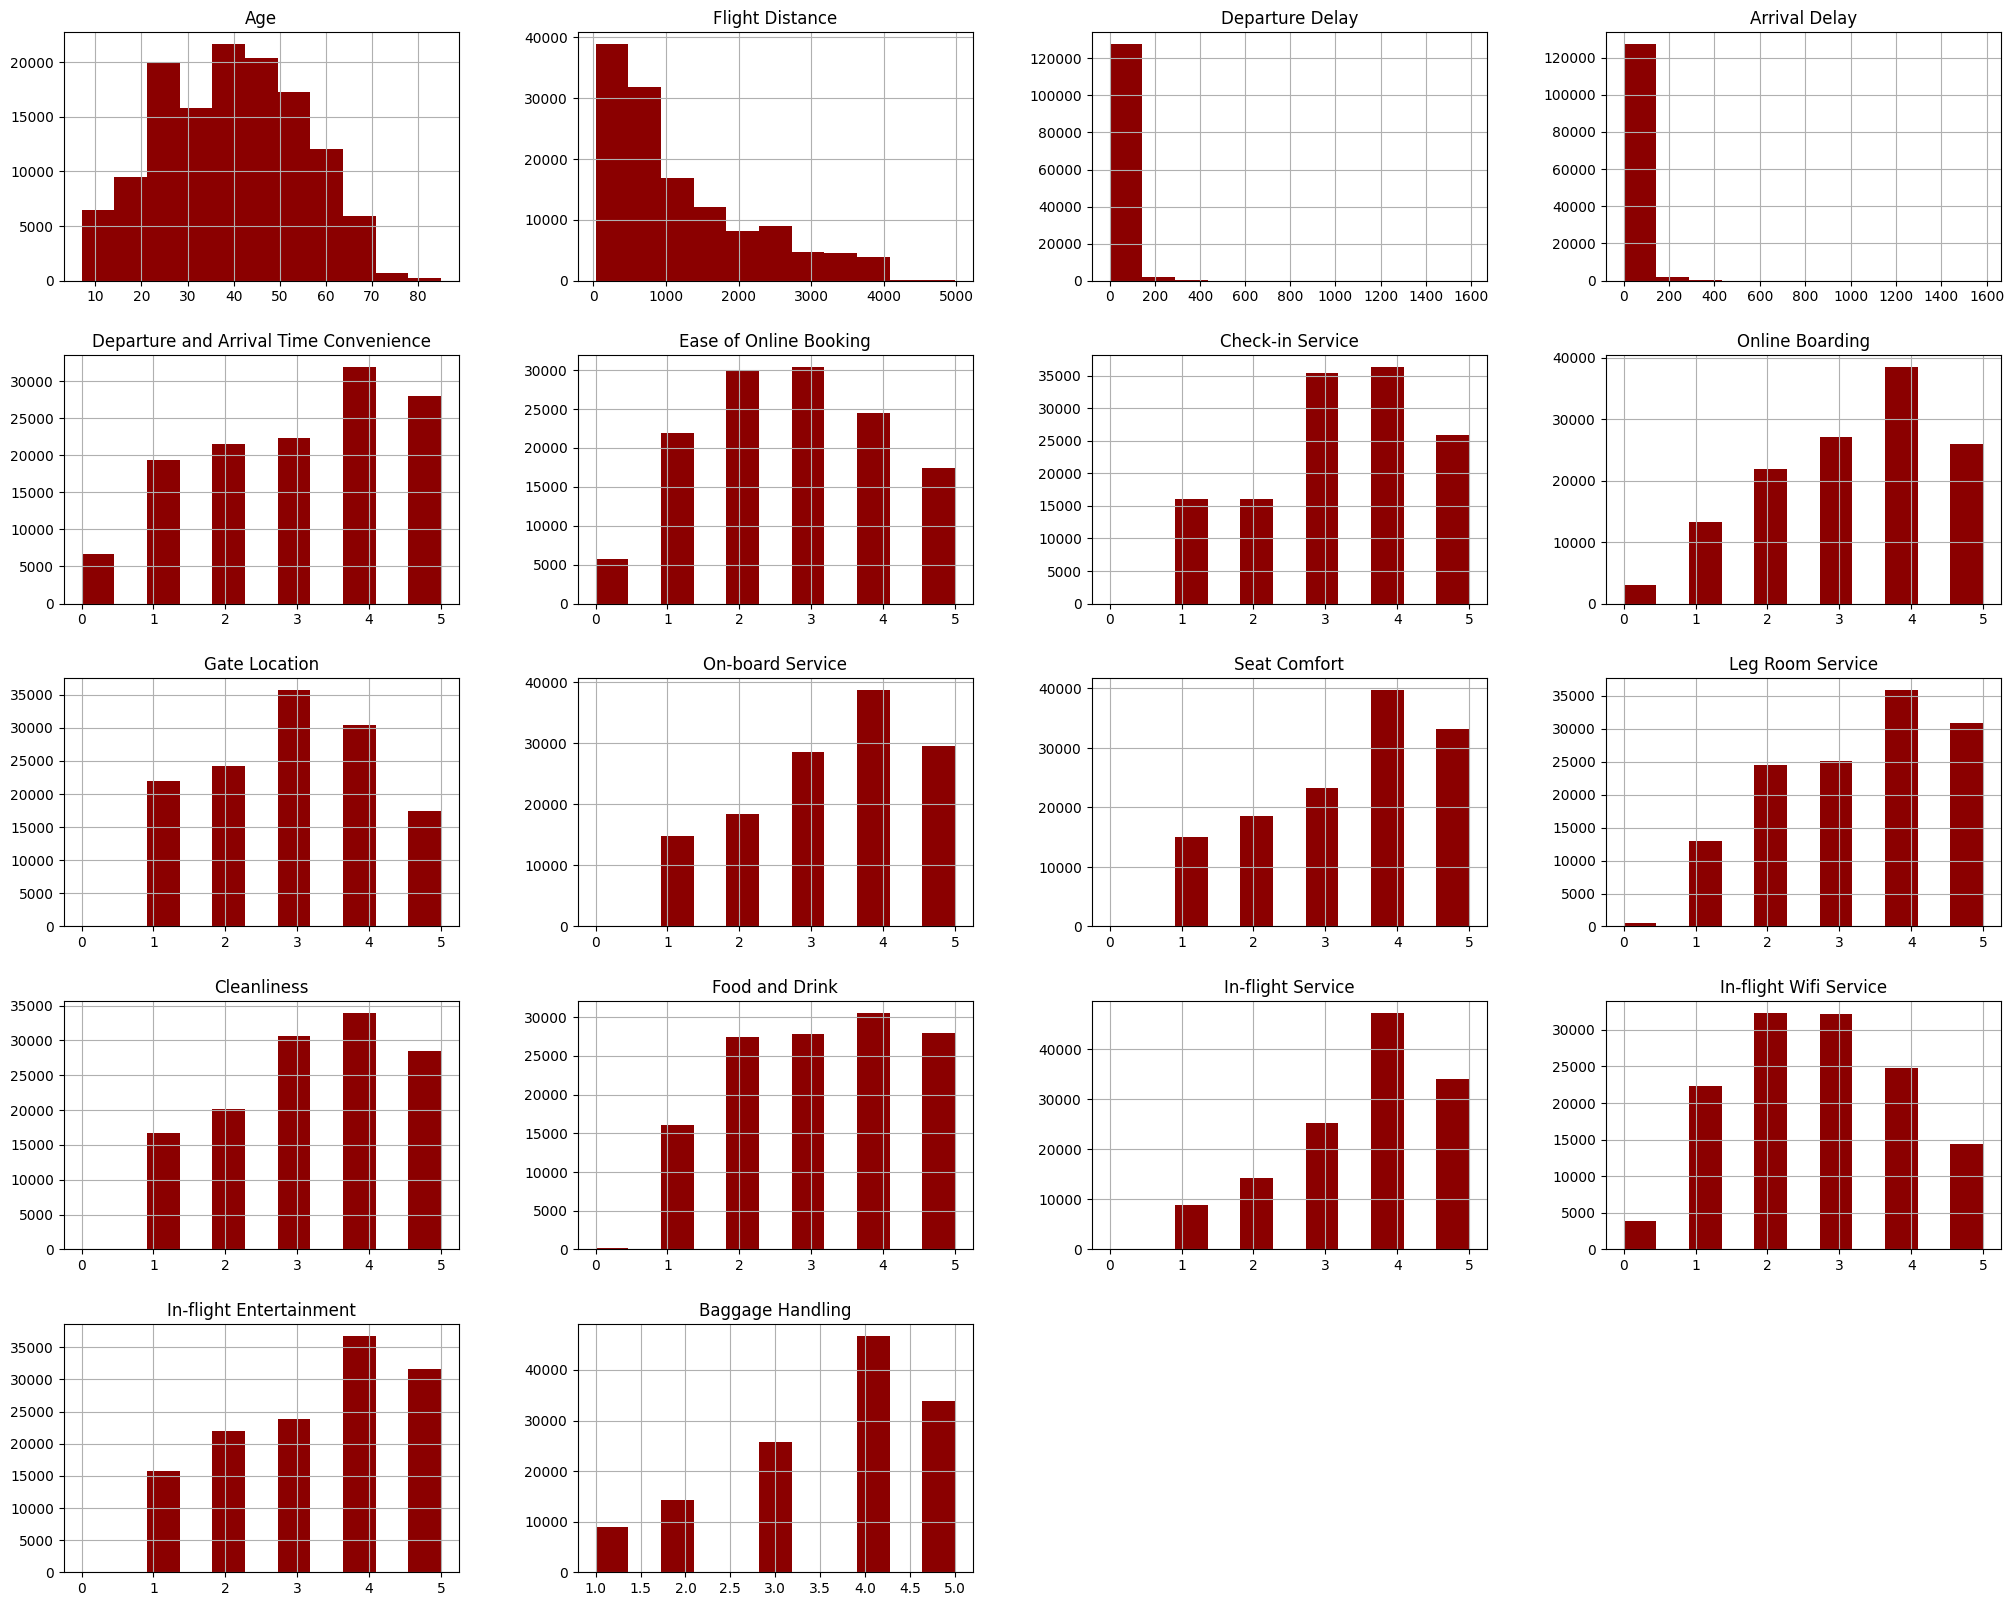

In [ ]:
binwidth=2
data.iloc[:,1:].hist(bins=11, figsize=(25,20), color='darkred')
plt.show()

In [ ]:
# Categorical Features Report
data.describe(exclude=['number'])

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


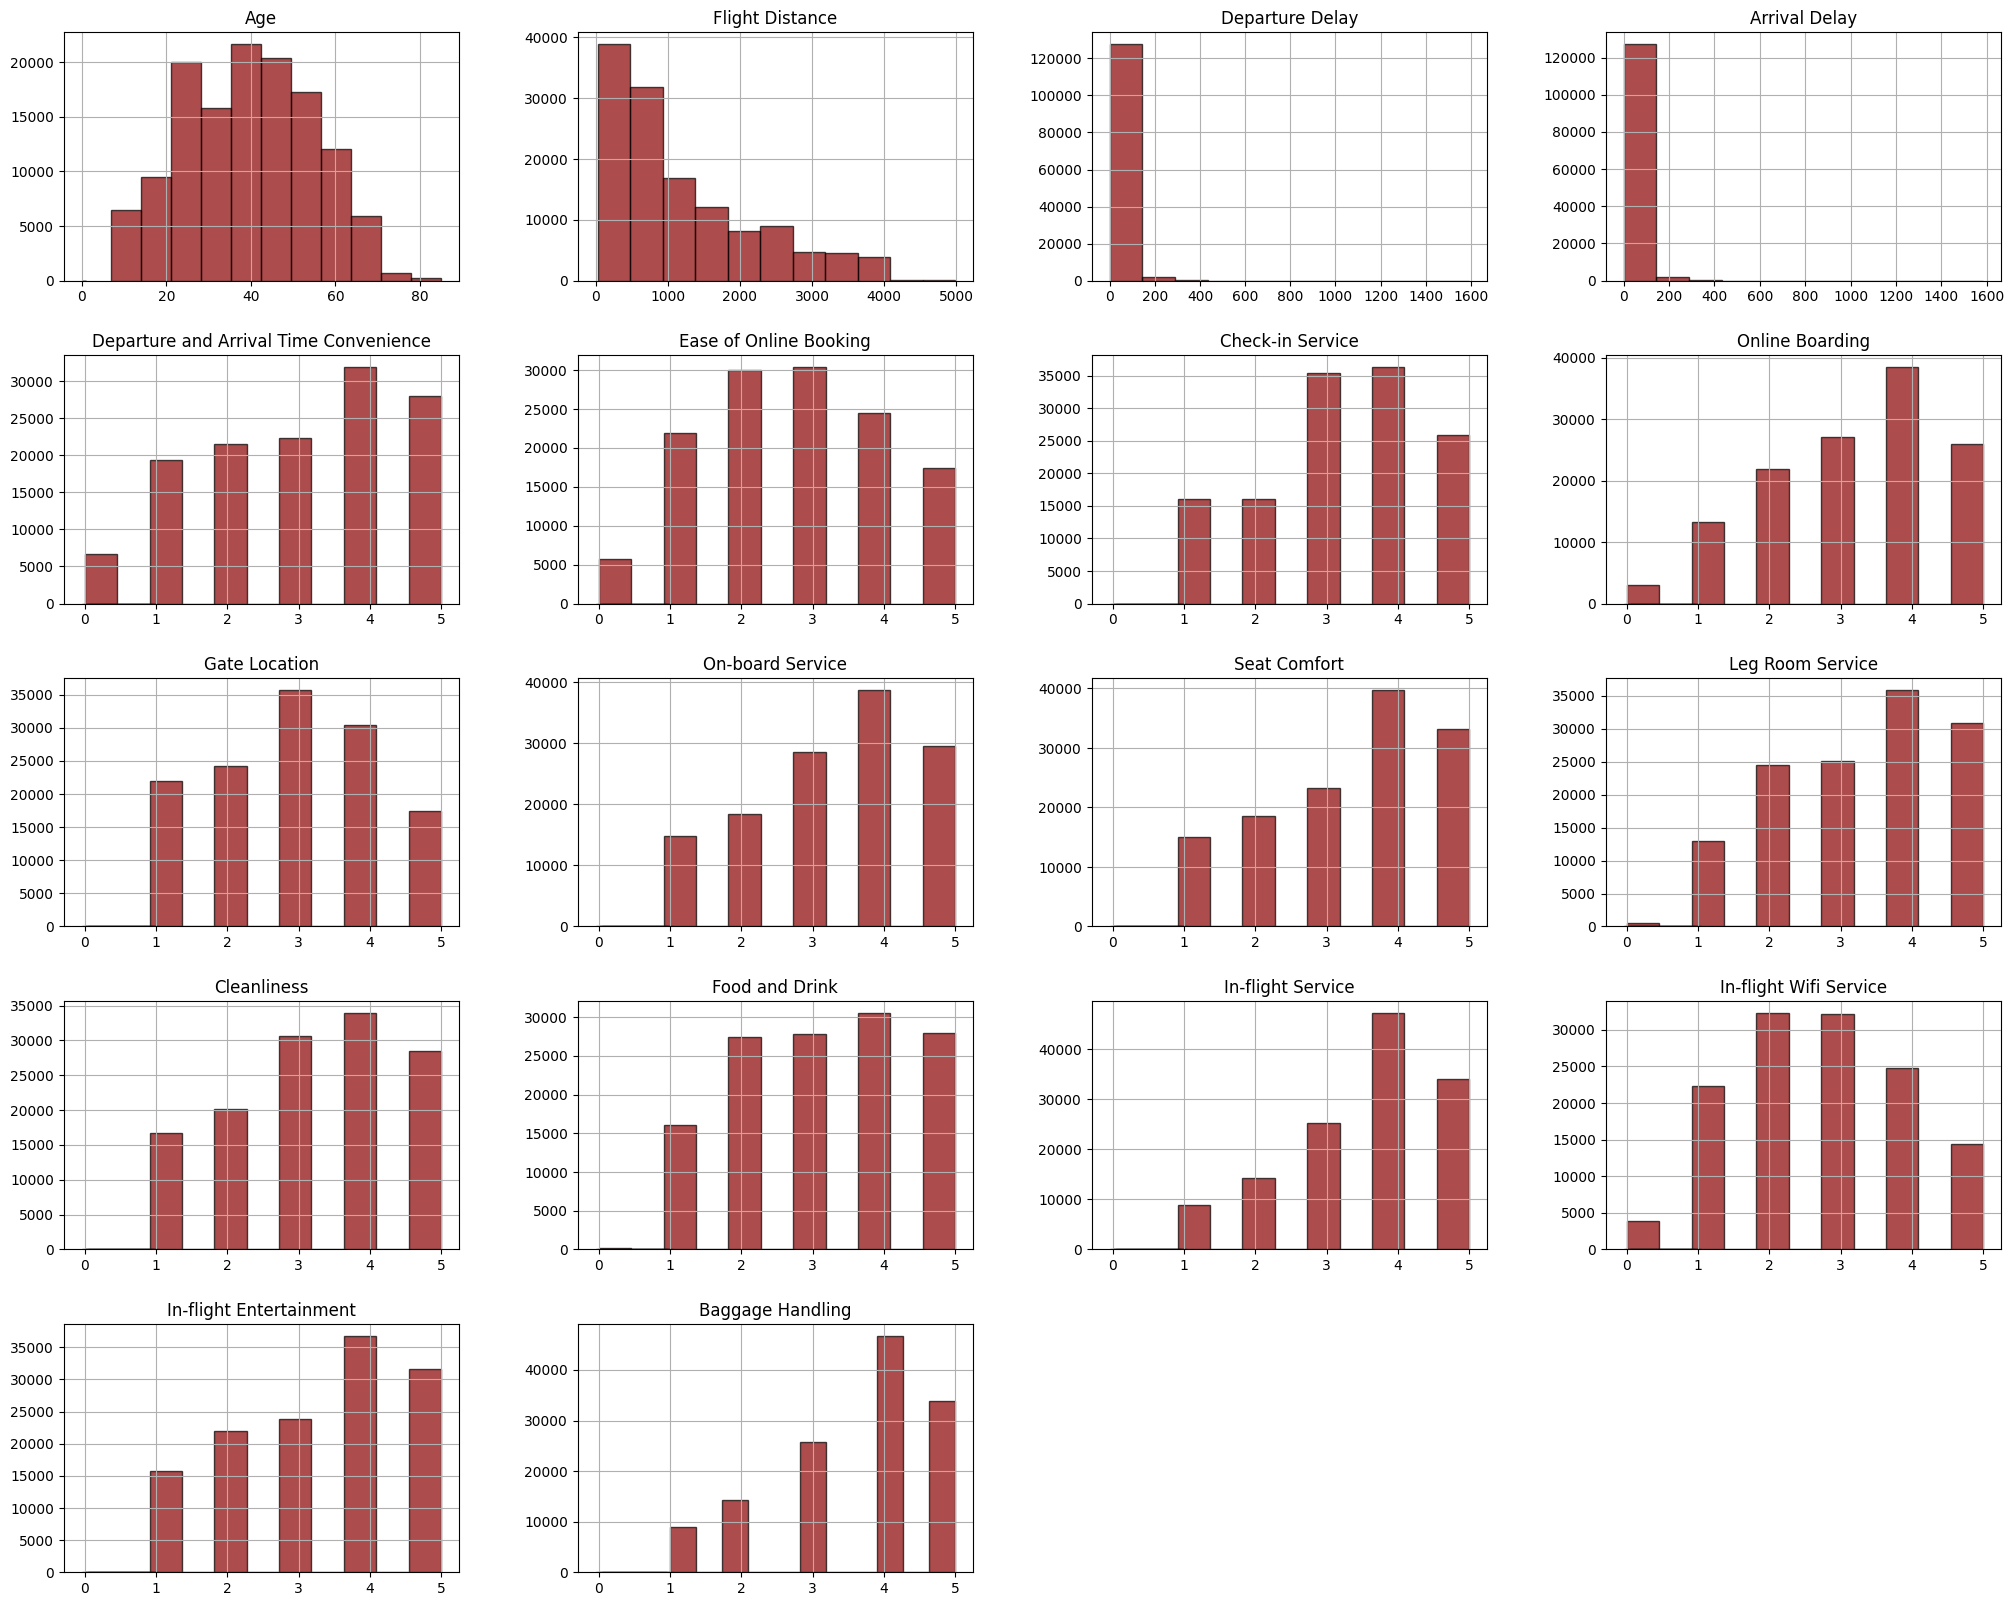

In [ ]:
binwidth = 2
data.iloc[:, 1:].hist(bins=11, figsize=(25, 20), color='darkred', edgecolor='black', alpha=0.7)

# Get the axes of the subplots
axes = plt.gcf().get_axes()

# Iterate through each subplot and convert the histogram to a bar plot
for ax in axes:
    # Get the histogram data
    heights, bins, _ = ax.hist([], bins=11, color='darkred', edgecolor='black', alpha=0.7)

    # Calculate the bin centers
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    # Calculate the width of each bar
    bar_width = binwidth * (bins[1] - bins[0])

    # Plot the bar plot
    ax.bar(bin_centers, heights, width=bar_width, color='darkred', edgecolor='black', alpha=0.7)

plt.show()

#### Data Preparation

In [ ]:
data.isnull().any()

Gender                                    False
Age                                       False
Customer Type                             False
Type of Travel                            False
Class                                     False
Flight Distance                           False
Departure Delay                           False
Arrival Delay                              True
Departure and Arrival Time Convenience    False
Ease of Online Booking                    False
Check-in Service                          False
Online Boarding                           False
Gate Location                             False
On-board Service                          False
Seat Comfort                              False
Leg Room Service                          False
Cleanliness                               False
Food and Drink                            False
In-flight Service                         False
In-flight Wifi Service                    False
In-flight Entertainment                 

In [ ]:
data = data.dropna(how='any',axis=0)

In [ ]:
# Checking Cardinality in the dataframe

cardinality = data.nunique()

# Print the cardinality for each column
cardinality

Gender                                       2
Age                                         75
Customer Type                                2
Type of Travel                               2
Class                                        3
Flight Distance                           3821
Departure Delay                            464
Arrival Delay                              472
Departure and Arrival Time Convenience       6
Ease of Online Booking                       6
Check-in Service                             6
Online Boarding                              6
Gate Location                                6
On-board Service                             6
Seat Comfort                                 6
Leg Room Service                             6
Cleanliness                                  6
Food and Drink                               6
In-flight Service                            6
In-flight Wifi Service                       6
In-flight Entertainment                      6
Baggage Handl

In [ ]:
data['Customer Type'].unique()

array(['First-time', 'Returning'], dtype=object)

In [ ]:
data['Type of Travel'].unique()

array(['Business', 'Personal'], dtype=object)

In [ ]:
data['Class'].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

to_categorical_list = ['Customer Type','Type of Travel', 'Class', 'Gender', 'Satisfaction']
for i in to_categorical_list:
  data[i]=data[i].astype('category')

# Encoding
# Customer Type : 0:First-time 1:Returning
# Type of Travel : 0:Business 1:Personal
# Class : 0:Business 1:Economy 2:Economy Plus
# Gender : 0:Male 1:Female
# Satisfactiob : 0:Neutral or Dissatisfied 1:Satisfied

labelencoder = LabelEncoder()
for i in to_categorical_list:
  data[i] = labelencoder.fit_transform(data[i])

data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,1,48,0,0,0,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
2,0,35,1,0,0,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
3,1,41,1,0,0,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
4,1,50,1,0,0,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
5,0,49,1,0,0,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1


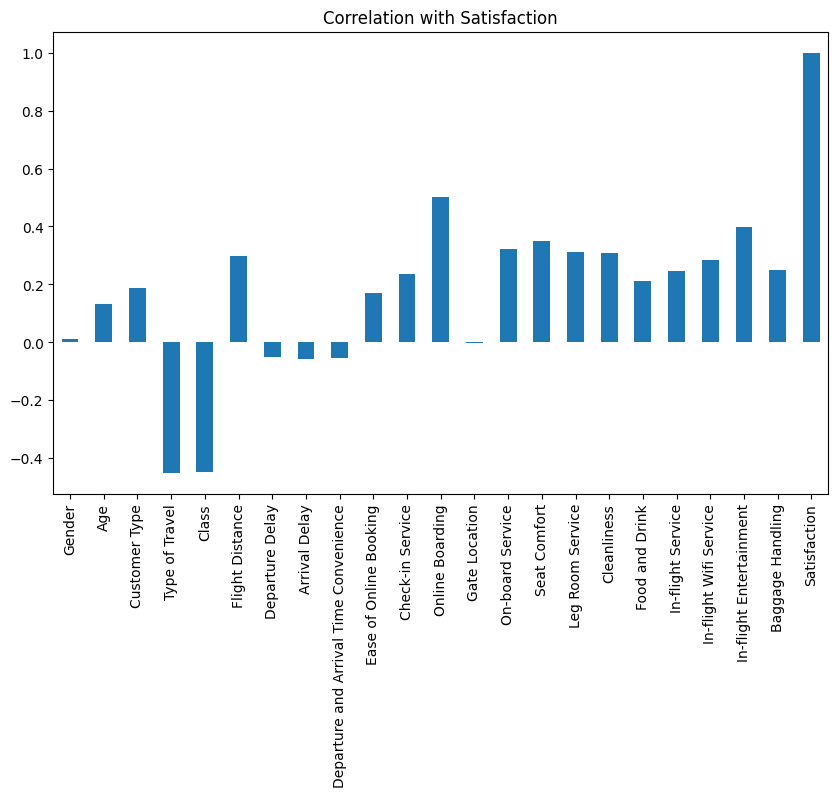

In [ ]:
# Correlation with Target Variable (Satisfaction here)
correlations = data.corrwith(data["Satisfaction"])

corr_df = pd.DataFrame(correlations, columns=['Correlation'])

plt.figure(figsize=(10, 6))
corr_df['Correlation'].plot(kind='bar')
plt.title('Correlation with Satisfaction')

plt.show()

In [ ]:
# Based on Cardinality and Correlation
new_df = data.drop(['Gender', 'Age', 'Customer Type', 'Departure Delay', 'Arrival Delay', 'Gate Location', 'Flight Distance'], axis=1)
new_df.head()

,Type of Travel,Class,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,
1,0,0,3,3,4,3,3,5,2,5,5,5,3,5,5,0
2,0,0,2,2,3,5,5,4,5,5,3,5,2,5,5,1
3,0,0,4,4,4,5,3,5,3,5,5,3,4,3,3,1
4,0,0,2,2,3,4,5,5,5,4,4,5,2,5,5,1
5,0,0,3,3,3,5,3,4,4,5,4,3,3,3,3,1


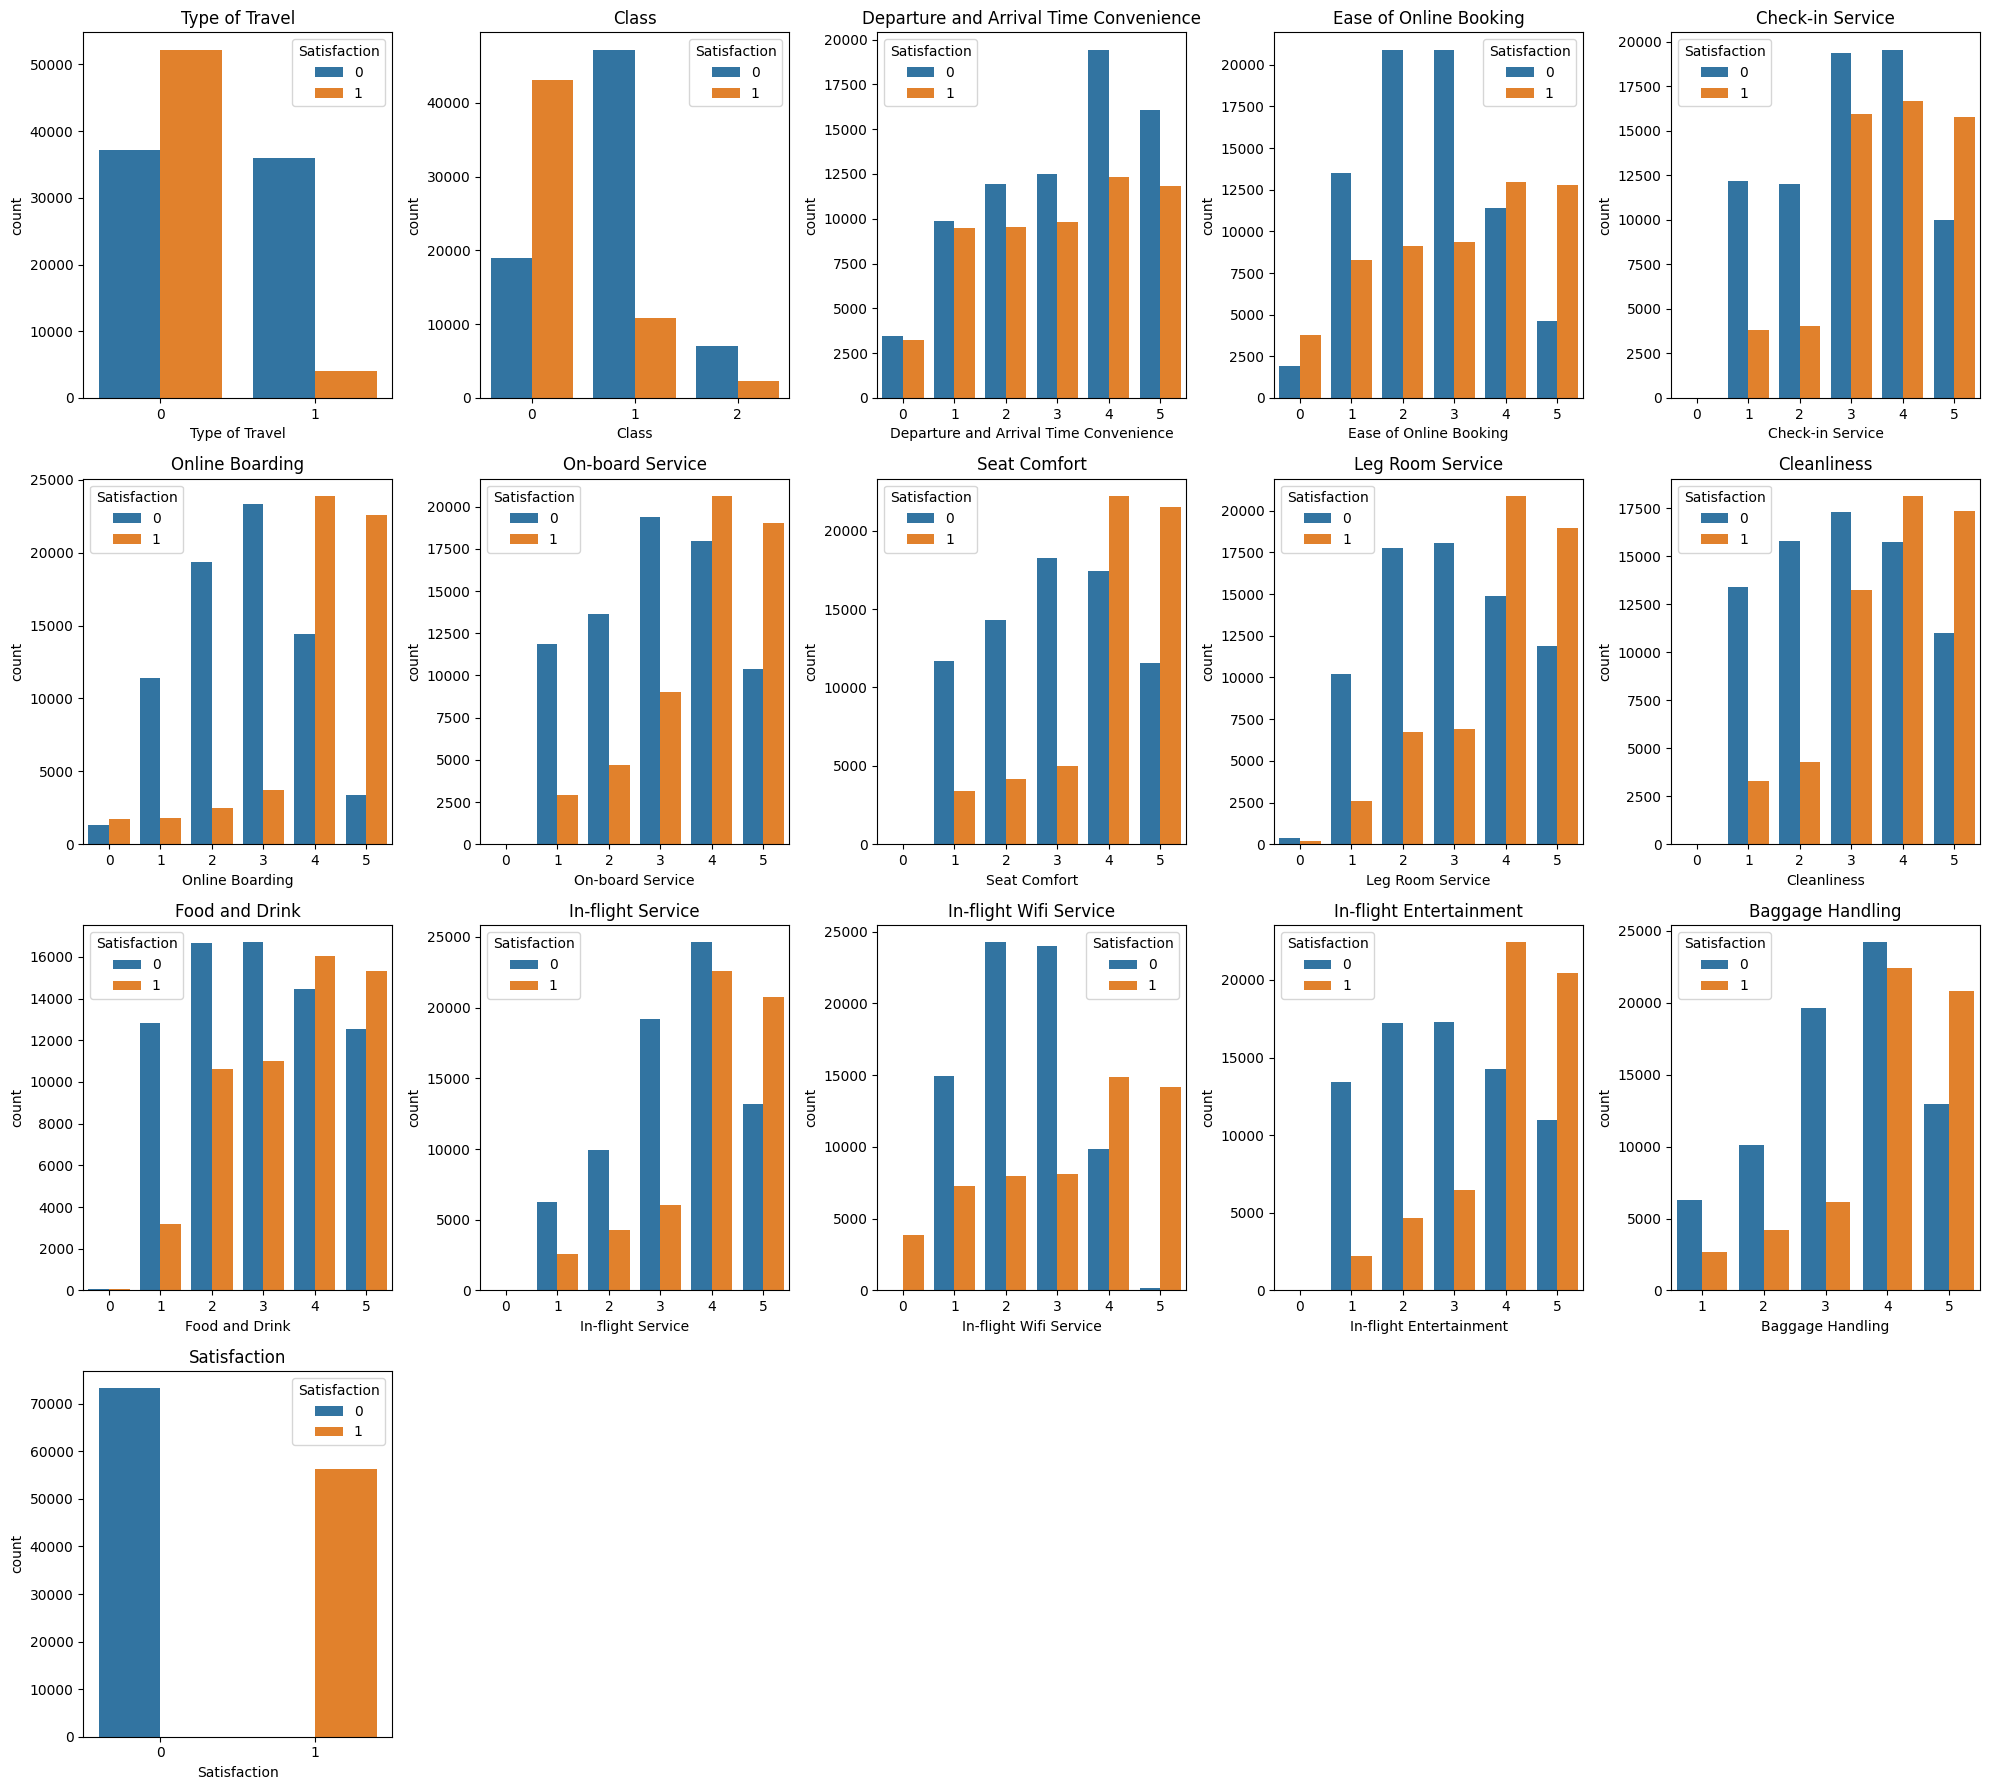

In [ ]:
plt.figure(figsize=(20, 18))
dataCol = new_df.columns

for i in range(len(dataCol)):
    plt.subplot(4, 5,i+1)
    plt.title(dataCol[i])
    sns.countplot(x=data[dataCol[i]],hue=data['Satisfaction'])

plt.tight_layout()
plt.show()

#### Train Test Split

In [ ]:
y = new_df['Satisfaction']
X = new_df.drop(['Satisfaction'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

#### Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfc, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Classifier Accuracy: ", accuracy_rfc)

classification_report_rfc = classification_report(y_test, y_pred_rfc)
print("Random Forest Classifier Classification Report: \n", classification_report_rfc)

Accuracy: 0.954 (0.002)
Random Forest Classifier Accuracy:  0.954899992277396
Random Forest Classifier Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     21951
           1       0.96      0.93      0.95     16896

    accuracy                           0.95     38847
   macro avg       0.96      0.95      0.95     38847
weighted avg       0.96      0.95      0.95     38847



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(dtc, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print("Decision Tree Classifier Accuracy: ", accuracy_dtc)

classification_report_dtc = classification_report(y_test, y_pred_dtc)
print("Decision Tree Classifier Classification Report: \n", classification_report_dtc)

Accuracy: 0.938 (0.002)
Decision Tree Classifier Accuracy:  0.9373181970293717
Decision Tree Classifier Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     21951
           1       0.93      0.93      0.93     16896

    accuracy                           0.94     38847
   macro avg       0.94      0.94      0.94     38847
weighted avg       0.94      0.94      0.94     38847

